# Alzheimer’s disease Classification

In [ ]:
!pip install colorama

In [ ]:
!pip install pip install scikit-plot

In [ ]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Acquisition

In [ ]:
import pandas as pd

# File path
file_path = '/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/dataset/CSI_7_MAL_2324_CW_resit_data.xlsx'

# Reading each sheet into a separate DataFrame
df_diagnosis_target = pd.read_excel(file_path, sheet_name='Diagnosis target')
df_cognitive_score = pd.read_excel(file_path, sheet_name='Cognitive score')
df_data = pd.read_excel(file_path, sheet_name='Data')



In [ ]:
df_diagnosis_target

RID  Test_data Diagnosis  FDG_PET  Unnamed: 4 Unnamed: 5  \
0        2          0        CN  1.36926         NaN         CN   
1        3          0        AD  1.09079         NaN        SMC   
2        4          1      LMCI      NaN         NaN       EMCI   
3        5          0        CN  1.29799         NaN        MCI   
4        6          0      LMCI      NaN         NaN       LMCI   
...    ...        ...       ...      ...         ...        ...   
1732  5287          0       SMC  1.58312         NaN        NaN   
1733  5295          0       SMC  1.16317         NaN        NaN   
1734  5296          0       SMC  1.42926         NaN        NaN   
1735  4264          1        CN      NaN         NaN        NaN   
1736  4740          0        AD      NaN         NaN        NaN   

                           Unnamed: 6  
0                    Cognitive normal  
1          Significant Memory Concern  
2     Early mild cognitive impairment  
3           Mild cognitive impairment  
4      Late mild cognitive impairment  
...                               ...  
1732                              NaN  
1733                              NaN  
1734                              NaN  
1735                              NaN  
1736                              NaN  

[1737 rows x 7 columns]

In [ ]:
df_cognitive_score

RID  Test_data  CDRSB  ADAS11  ADAS13  MMSE  RAVLT_immediate  \
0        2          0    0.0   10.67   18.67    28             44.0   
1        3          0    4.5   22.00   31.00    20             22.0   
2        4          1    1.0   14.33   21.33    27             37.0   
3        5          0    0.0    8.67   14.67    29             37.0   
4        6          0    0.5   18.67   25.67    25             30.0   
...    ...        ...    ...     ...     ...   ...              ...   
1732  5287          0    0.5    3.00    4.00    29             50.0   
1733  5295          0    0.5   11.00   18.00    29             28.0   
1734  5296          0    0.0    9.00   14.00    29             38.0   
1735  4264          1    0.0    3.00    6.00    29             48.0   
1736  4740          0    1.5   29.00   41.00    22              8.0   

      RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  
0                4.0               6.0                54.5455  
1                1.0               4.0               100.0000  
2                7.0               4.0                36.3636  
3                4.0               4.0                44.4444  
4                1.0               5.0                83.3333  
...              ...               ...                    ...  
1732            10.0               4.0                26.6667  
1733             4.0               4.0                50.0000  
1734             2.0               6.0                75.0000  
1735             7.0              13.0               100.0000  
1736             2.0               2.0               100.0000  

[1737 rows x 10 columns]

In [ ]:
df_data

RID  Test_data   Age  Gender  Year_education        Ethnicity   Race  \
0        2          0  74.3    Male              16  Not Hisp/Latino  White   
1        3          0  81.3    Male              18  Not Hisp/Latino  White   
2        4          1  67.5    Male              10      Hisp/Latino  White   
3        5          0  73.7    Male              16  Not Hisp/Latino  White   
4        6          0  80.4  Female              13  Not Hisp/Latino  White   
...    ...        ...   ...     ...             ...              ...    ...   
1732  5287          0  78.9  Female              16  Not Hisp/Latino  White   
1733  5295          0  75.5  Female              15  Not Hisp/Latino  White   
1734  5296          0  69.3    Male              14  Not Hisp/Latino  White   
1735  4264          1  74.1  Female              18  Not Hisp/Latino  White   
1736  4740          0  88.3    Male              12  Not Hisp/Latino  White   

     Marital_status  High_risk_ApoE4  Ventricles  ...  \
0           Married              0.0    118233.0  ...   
1           Married              1.0     84599.0  ...   
2           Married              0.0     39605.0  ...   
3           Married              0.0     34062.0  ...   
4           Married              0.0     39826.0  ...   
...             ...              ...         ...  ...   
1732        Married              0.0         NaN  ...   
1733        Married              1.0         NaN  ...   
1734        Married              0.0     18633.0  ...   
1735       Divorced              0.0     50196.0  ...   
1736        Married              NaN         NaN  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                 2.077        
1                                                 1.942        
2     

In [ ]:
# Merge the DataFrames on the 'RID' and 'Test_Data' columns
df_merged = pd.merge(df_diagnosis_target, df_cognitive_score, on=['RID', 'Test_data'], how='inner')
df_final_merged = pd.merge(df_merged, df_data, on=['RID', 'Test_data'], how='inner')

In [ ]:
df_final_merged

RID  Test_data Diagnosis  FDG_PET  Unnamed: 4 Unnamed: 5  \
0        2          0        CN  1.36926         NaN         CN   
1        3          0        AD  1.09079         NaN        SMC   
2        4          1      LMCI      NaN         NaN       EMCI   
3        5          0        CN  1.29799         NaN        MCI   
4        6          0      LMCI      NaN         NaN       LMCI   
...    ...        ...       ...      ...         ...        ...   
1732  5287          0       SMC  1.58312         NaN        NaN   
1733  5295          0       SMC  1.16317         NaN        NaN   
1734  5296          0       SMC  1.42926         NaN        NaN   
1735  4264          1        CN      NaN         NaN        NaN   
1736  4740          0        AD      NaN         NaN        NaN   

                           Unnamed: 6  CDRSB  ADAS11  ADAS13  ...  \
0                    Cognitive normal    0.0   10.67   18.67  ...   
1          Significant Memory Concern    4.5   22.00   31.00  ...   
2     Early mild cognitive impairment    1.0   14.33   21.33  ...   
3           Mild cognitive impairment    0.0    8.67   14.67  ...   
4      Late mild cognitive impairment    0.5   18.67   25.67  ...   
...                               ...    ...     ...     ...  ...   
1732                              NaN    0.5    3.00    4.00  ...   
1733                              NaN    0.5   11.00   18.00  ...   
1734                              NaN    0.0    9.00   14.00  ...   
1735                              NaN    0.0    3.00    6.00  ...   
1736                              NaN    1.5   29.00   41.00  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                 2.077        
1                                                 1.942        
2     

In [ ]:
df_final_merged.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/dataset/df_final_merged.csv')

# Exploratory Data Analysis

In [ ]:
df_final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 1736
Columns: 374 entries, RID to Volume (WM Parcellation) of FourthVentricle
dtypes: float64(18), int64(4), object(352)
memory usage: 5.0+ MB


In [ ]:
# Descriptive statistics
df_final_merged.describe()

RID    Test_data      FDG_PET  Unnamed: 4        CDRSB  \
count  1737.000000  1737.000000  1303.000000         0.0  1737.000000   
mean   2603.533679     0.199770     1.233933         NaN     1.639321   
std    1926.356831     0.399942     0.154161         NaN     1.792005   
min       2.000000     0.000000     0.697264         NaN     0.000000   
25%     759.000000     0.000000     1.141735         NaN     0.000000   
50%    2150.000000     0.000000     1.245480         NaN     1.000000   
75%    4546.000000     0.000000     1.336715         NaN     2.500000   
max    5296.000000     1.000000     1.707170         NaN    10.000000   

            ADAS11       ADAS13         MMSE  RAVLT_immediate  RAVLT_learning  \
count  1732.000000  1723.000000  1737.000000      1731.000000     1731.000000   
mean     10.773672    16.899008    27.173287        35.153091        4.177354   
std       6.657689     9.584230     2.666661        12.464480        2.734129   
min       0.000000     0.000000    18.000000         0.000000       -4.000000   
25%       6.000000     9.330000    26.000000        26.000000        2.000000   
50%       9.000000    15.000000    28.000000        34.000000        4.000000   
75%      14.000000    23.000000    29.000000        44.000000        6.000000   
max      42.670000    54.670000    30.000000        71.000000       12.000000   

       ...          Age  Year_education  High_risk_ApoE4     Ventricles  \
count  ...  1737.000000     1737.000000      1725.000000    1655.000000   
mean   ...    73.770466       15.905009         0.568116   40283.351662   
std    ...     7.196227        2.857334         0.666242   22651.381731   
min    ...    54.400000        4.000000         0.000000    5650.000000   
25%    ...    69.200000       14.000000         0.000000   23824.500000   
50%    ...    73.900000       16.000000         0.000000   35281.000000   
75%    ...    78.900000       18.000000         1.000000   51408.500000   
max    ...    91.400000       20.000000         2.000000  145115.000000   

        Hippocampus    WholeBrain   Entorhinal      Fusiform       MidTemp  \
count   1489.000000  1.689000e+03  1466.000000   1466.000000   1466.000000   
mean    6788.269980  1.020934e+06  3486.980218  17308.341746  19453.816508   
std     1185.171734  1.113932e+05   780.496369   2754.102552   3087.621326   
min     2991.000000  6.693640e+05  1426.000000   8991.000000   9375.000000   
25%     5948.000000  9.404060e+05  2951.000000  15441.500000  17483.000000   
50%     6862.000000  1.015620e+06  3508.000000  17270.000000  19418.500000   
75%     7651.000000  1.095870e+06  4041.500000  19101.250000  21521.750000   
max    10769.000000  1.486040e+06  5896.000000  29950.000000  32189.000000   

       Intra cranial volume  
count          1.722000e+03  
mean           1.531371e+06  
std            1.666042e+05  
min            1.100690e+06  
25%            1.411150e+06  
50%            1.517040e+06  
75%            1.640522e+06  
max            2.110290e+06  

[8 rows x 22 columns]

In [ ]:
a=df_final_merged.describe()
a.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/description.csv')

In [ ]:
b=np.transpose(a)

In [ ]:
print(df_final_merged['Diagnosis'].value_counts())

LMCI    562
CN      417
AD      342
EMCI    310
SMC     106
Name: Diagnosis, dtype: int64


In [ ]:
df_final_merged.isnull().sum()

RID                                                                0
Test_data                                                          0
Diagnosis                                                          0
FDG_PET                                                          434
Unnamed: 4                                                      1737
                                                                ... 
Volume (Cortical Parcellation) of RightMiddleTemporal              0
Surface Area of RightMiddleTemporal                                0
Cortical Thickness Average of RightMiddleTemporal                  0
Cortical Thickness Standard Deviation of RightMiddleTemporal       0
Volume (WM Parcellation) of FourthVentricle                        0
Length: 374, dtype: int64

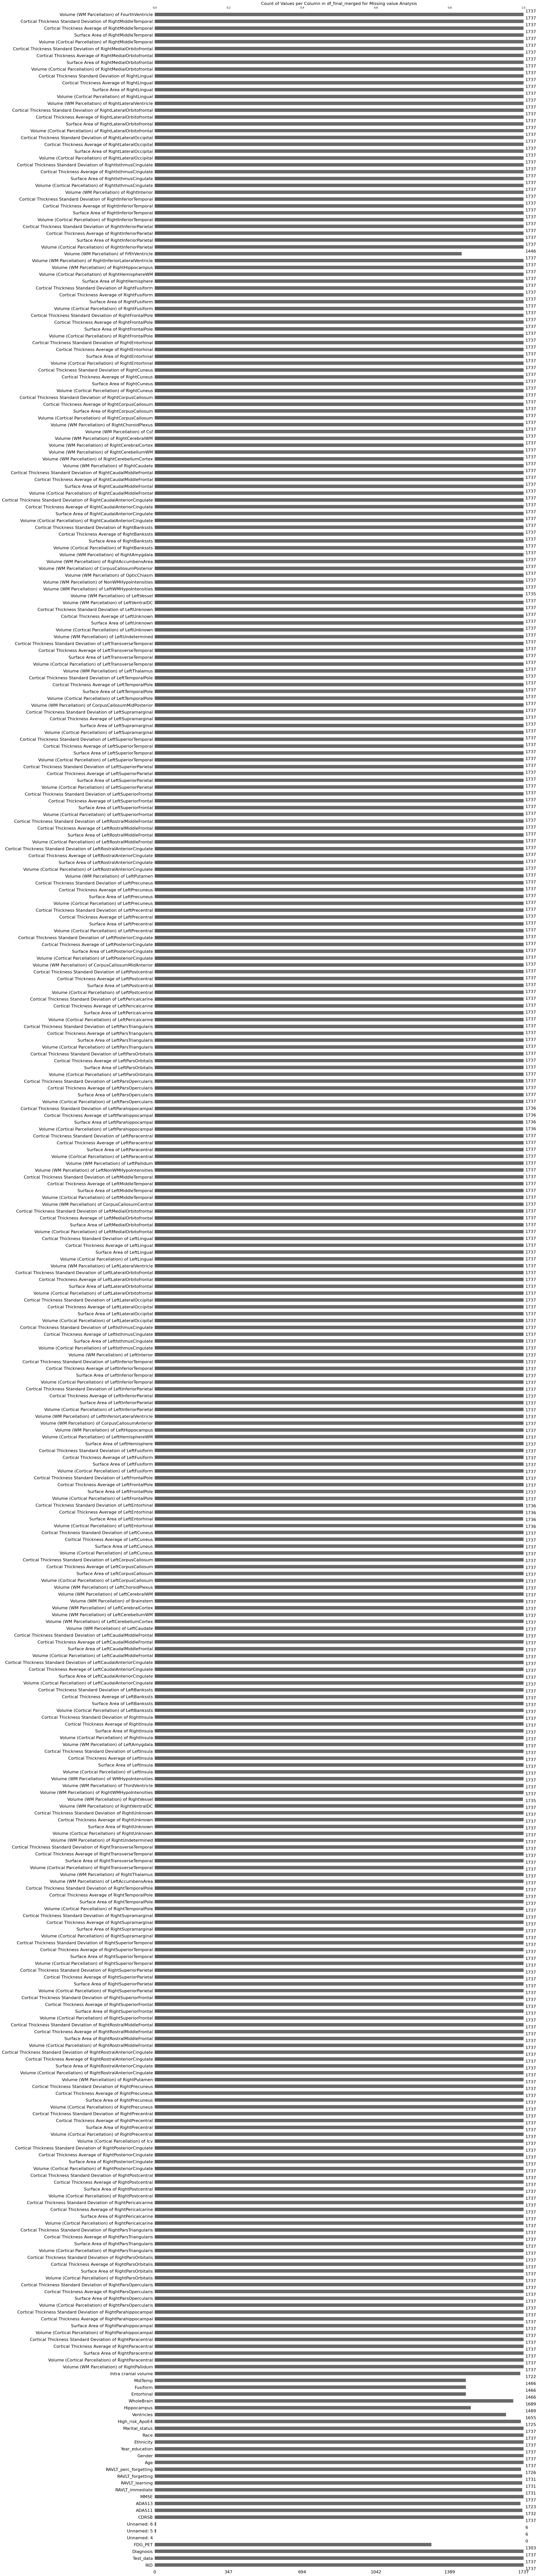

In [ ]:
import missingno as msno
msno.bar(df_final_merged) # you can see pandas-profilin count part
plt.title('Count of Values per Column in df_final_merged for Missing value Analysis', size=16)
plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/df_final_mergednagraph.png')
plt.show()

In [ ]:
# Class Distribution
samples= np.transpose(df_final_merged['Diagnosis'].value_counts())

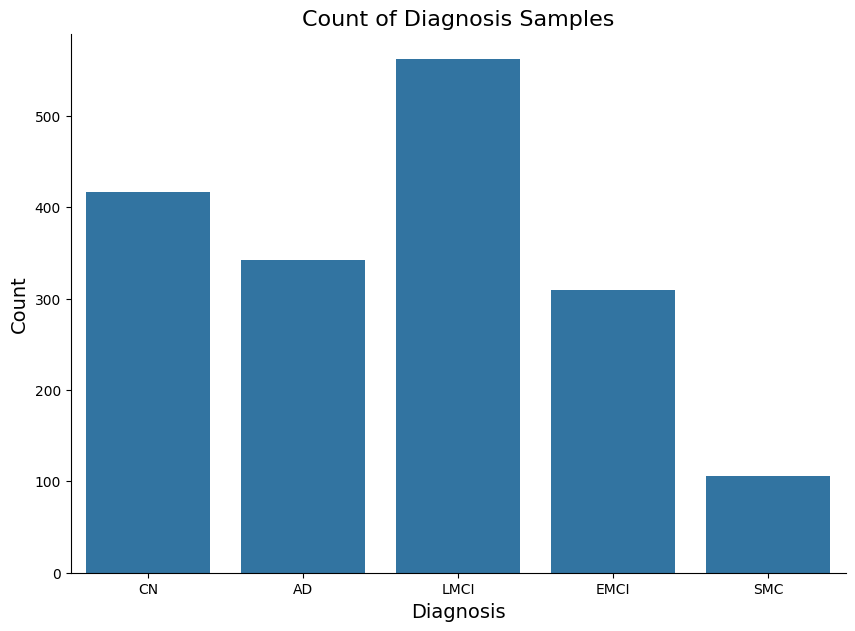

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Count of Diagnosis Samples', size=16)
sns.countplot(x='Diagnosis', data=df_final_merged)
plt.ylabel('Count', size=14)
plt.xlabel('Diagnosis', size=14)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/CountofCategoriesgraph.png')
plt.show()

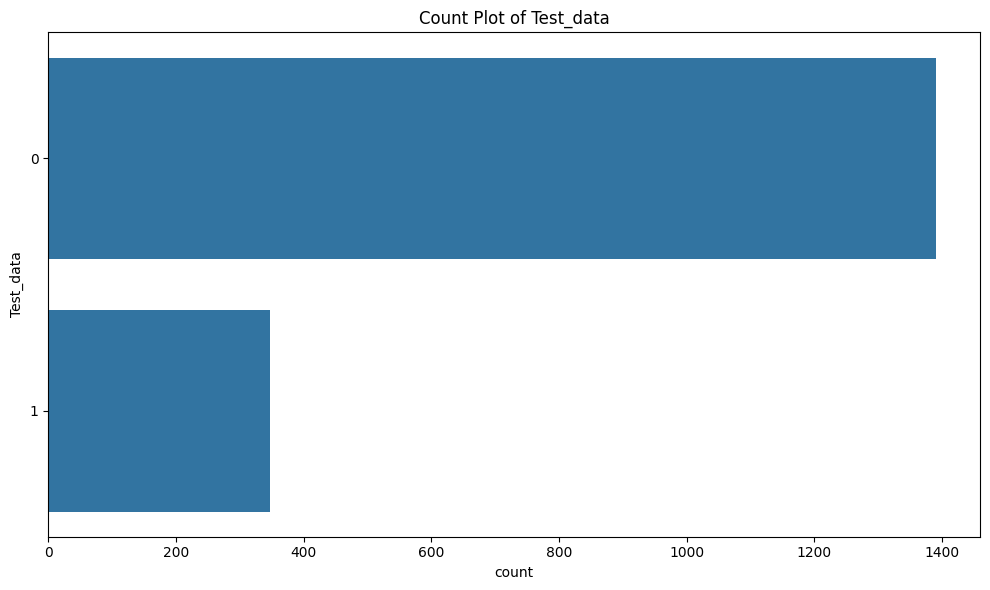

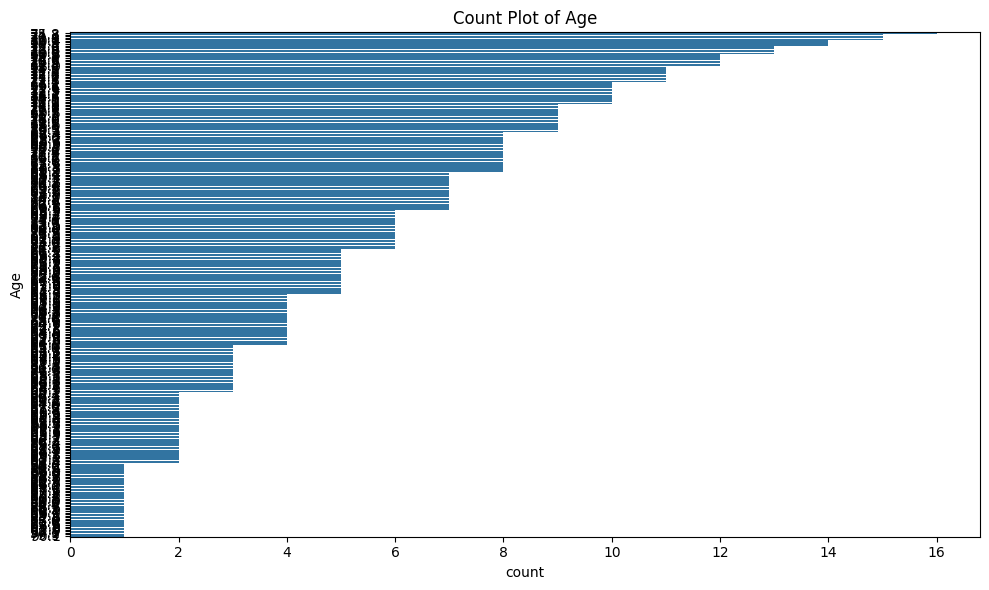

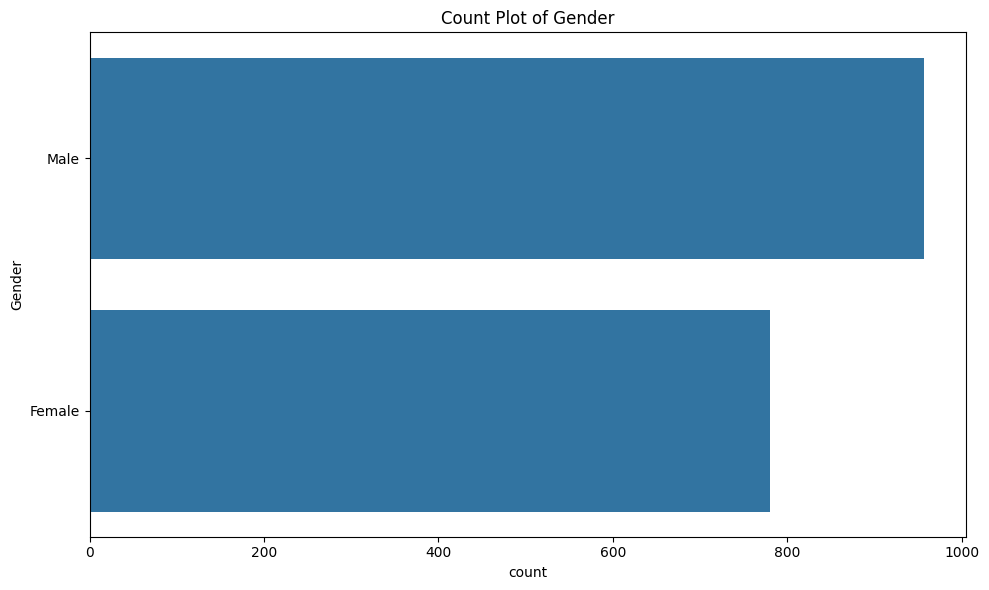

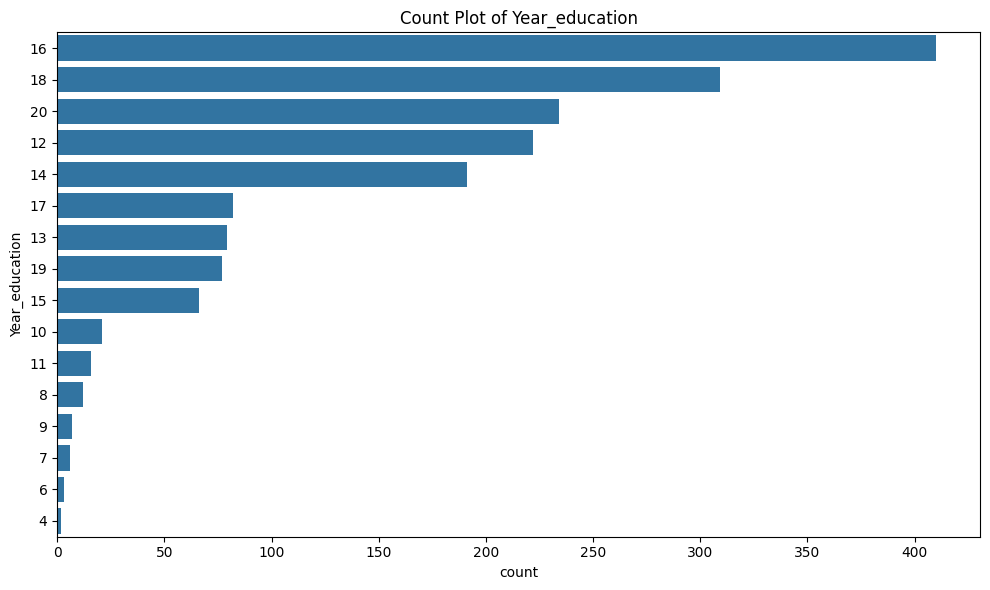

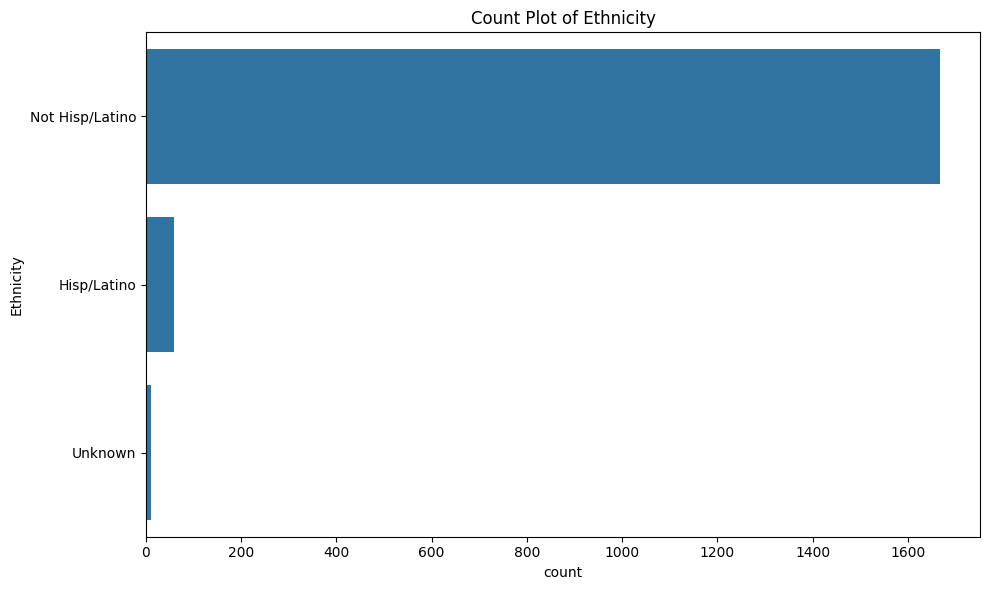

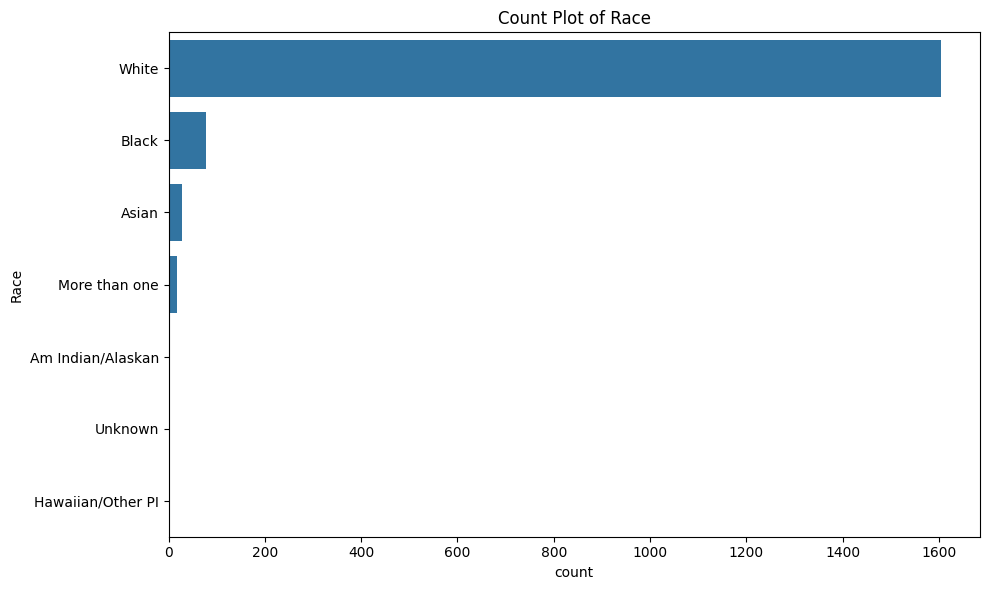

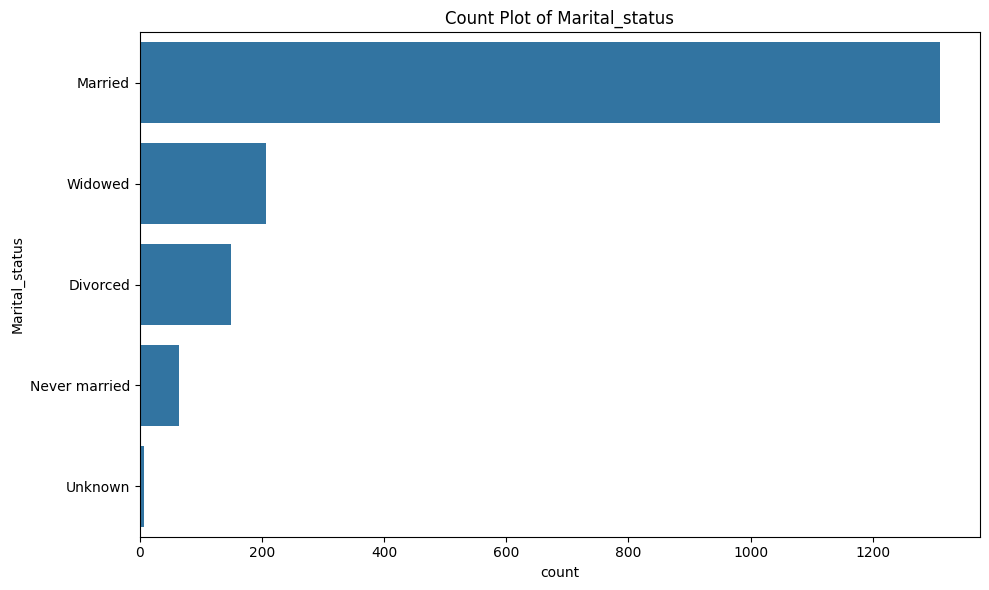

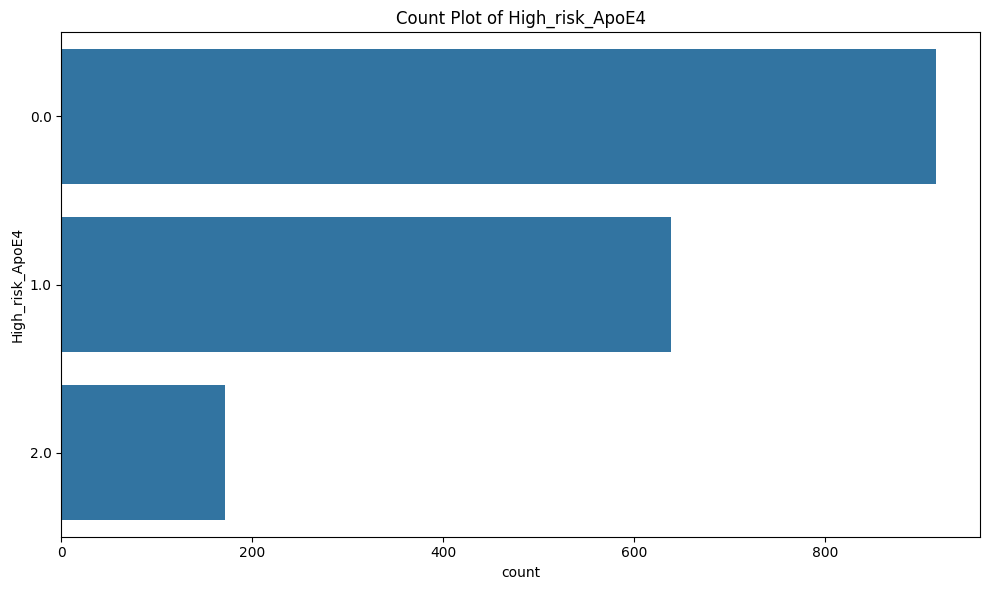

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_final_merged is your DataFrame

# Filter columns to include only object types
Catcolumns=['Test_data','Age','Gender','Year_education','Ethnicity','Race','Marital_status','High_risk_ApoE4']

for column_name in Catcolumns:
    plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
    sns.countplot(y=column_name, data=df_final_merged, order = df_final_merged[column_name].value_counts().index)
    plt.title('Count Plot of ' + column_name)
    plt.tight_layout()
    plt.show()
    # Save plot to specified path
    # Ensure the directory exists or adjust the path as necessary
    plt.savefig(f'/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/CategoricalCountPlot/Count Plot of {column_name}.png')
    plt.close()  # Close the plot to avoid displaying it in the notebook output


In [ ]:
columnnames=list(df_final_merged.columns)
print(columnnames)

['RID', 'Test_data', 'Diagnosis', 'FDG_PET', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'Age', 'Gender', 'Year_education', 'Ethnicity', 'Race', 'Marital_status', 'High_risk_ApoE4', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'Intra cranial volume', 'Volume (WM Parcellation) of RightPallidum', 'Volume (Cortical Parcellation) of RightParacentral', 'Surface Area of RightParacentral', 'Cortical Thickness Average of RightParacentral', 'Cortical Thickness Standard Deviation of RightParacentral', 'Volume (Cortical Parcellation) of RightParahippocampal', 'Surface Area of RightParahippocampal', 'Cortical Thickness Average of RightParahippocampal', 'Cortical Thickness Standard Deviation of RightParahippocampal', 'Volume (Cortical Parcellation) of RightParsOpercularis', 'Surface Area of RightParsOpercularis', 'Cortical Thickness Average of Right

In [ ]:
columnnames

['RID',
 'Test_data',
 'Diagnosis',
 'FDG_PET',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'Age',
 'Gender',
 'Year_education',
 'Ethnicity',
 'Race',
 'Marital_status',
 'High_risk_ApoE4',
 'Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'Intra cranial volume',
 'Volume (WM Parcellation) of RightPallidum',
 'Volume (Cortical Parcellation) of RightParacentral',
 'Surface Area of RightParacentral',
 'Cortical Thickness Average of RightParacentral',
 'Cortical Thickness Standard Deviation of RightParacentral',
 'Volume (Cortical Parcellation) of RightParahippocampal',
 'Surface Area of RightParahippocampal',
 'Cortical Thickness Average of RightParahippocampal',
 'Cortical Thickness Standard Deviation of RightParahippocampal',
 'Volume (Cortical Parcellation) of RightParsOpercularis',
 'Surface Area of RightParsOpercularis

<Figure size 1000x600 with 0 Axes>

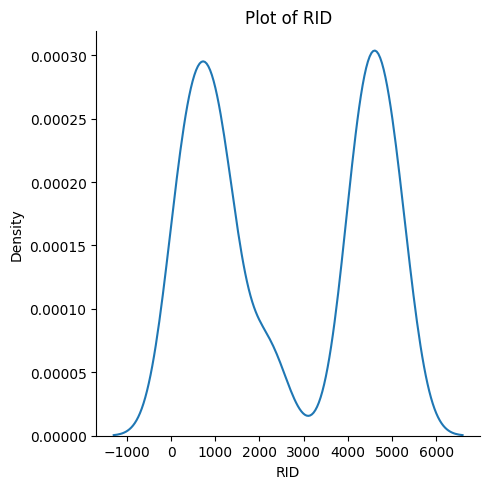

<Figure size 1000x600 with 0 Axes>

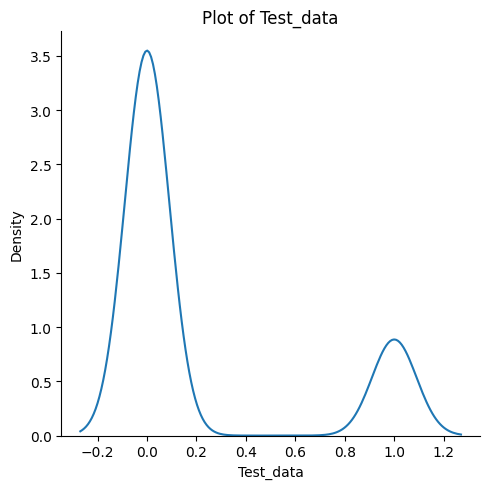

<Figure size 1000x600 with 0 Axes>

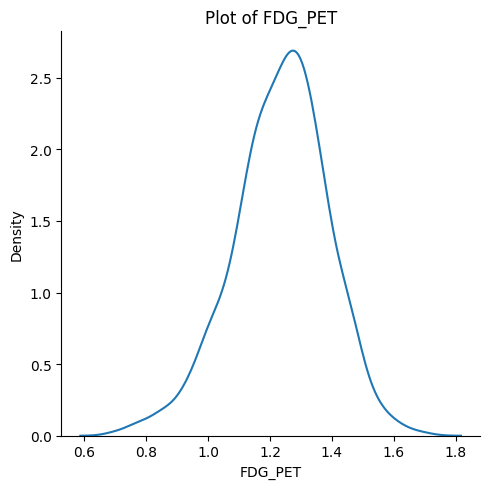

<Figure size 1000x600 with 0 Axes>

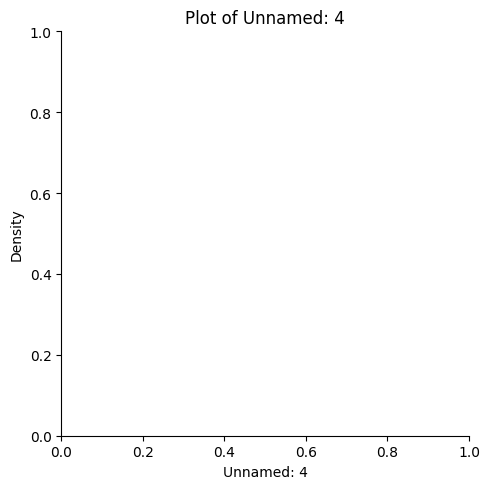

<Figure size 1000x600 with 0 Axes>

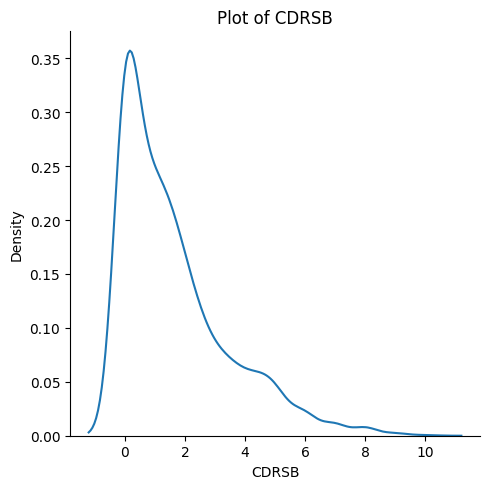

<Figure size 1000x600 with 0 Axes>

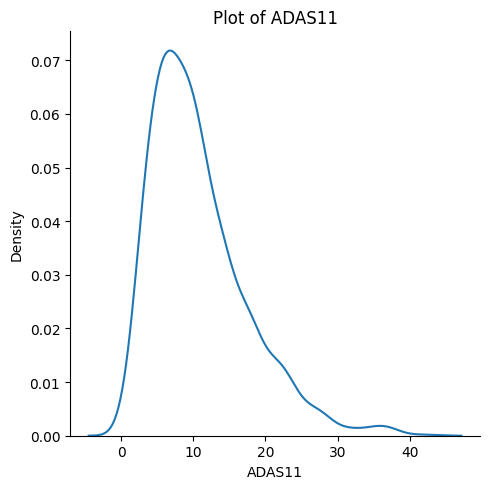

<Figure size 1000x600 with 0 Axes>

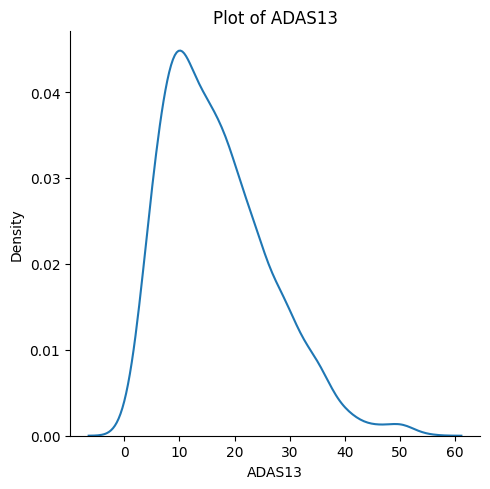

<Figure size 1000x600 with 0 Axes>

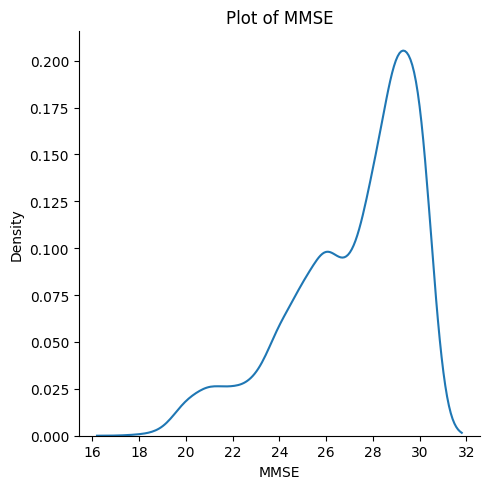

<Figure size 1000x600 with 0 Axes>

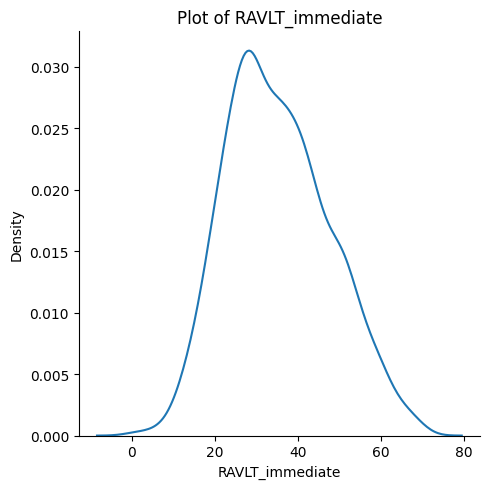

<Figure size 1000x600 with 0 Axes>

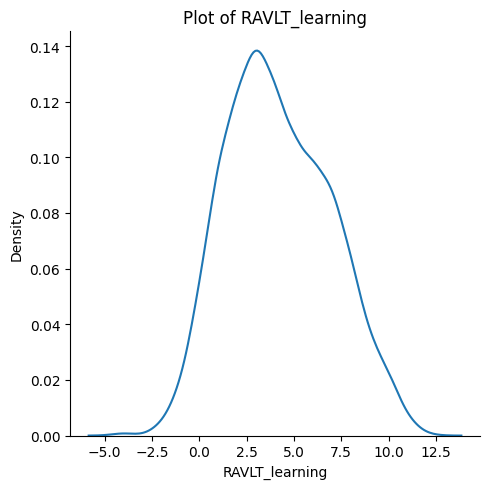

<Figure size 1000x600 with 0 Axes>

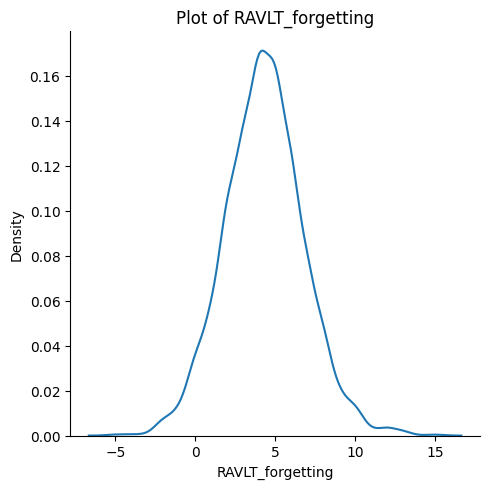

<Figure size 1000x600 with 0 Axes>

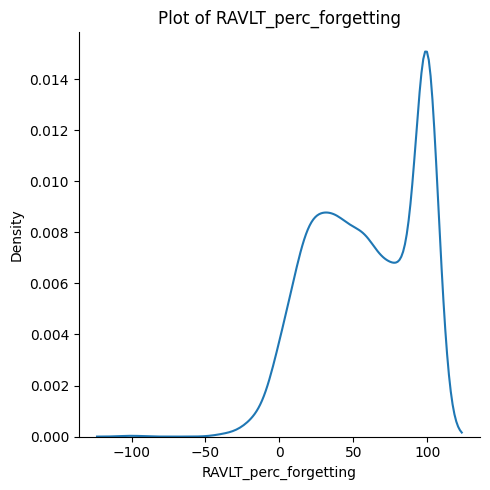

<Figure size 1000x600 with 0 Axes>

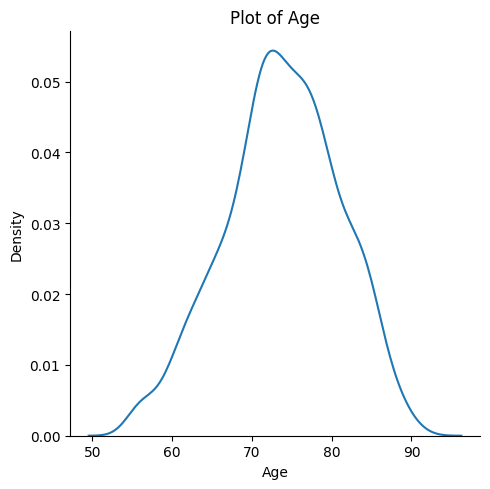

<Figure size 1000x600 with 0 Axes>

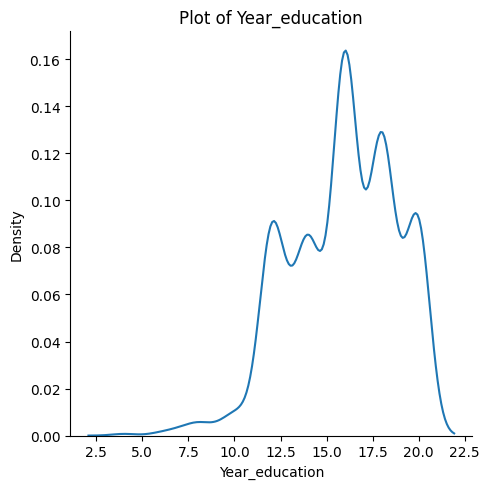

<Figure size 1000x600 with 0 Axes>

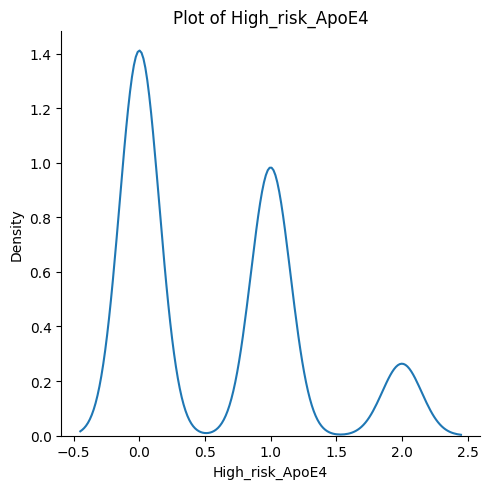

<Figure size 1000x600 with 0 Axes>

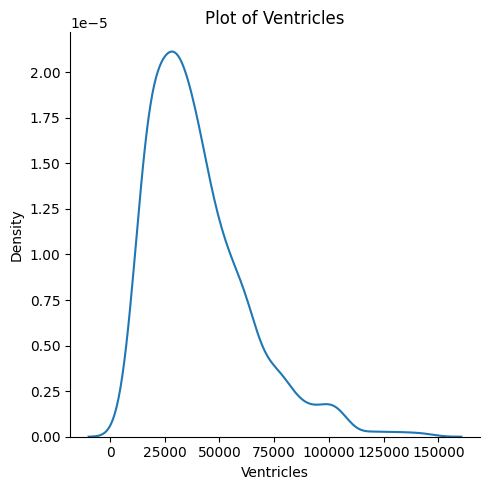

<Figure size 1000x600 with 0 Axes>

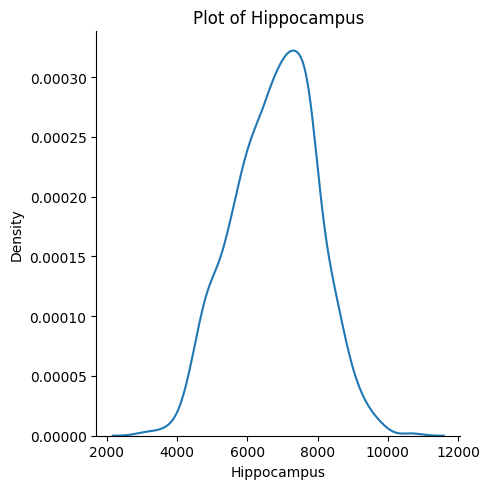

<Figure size 1000x600 with 0 Axes>

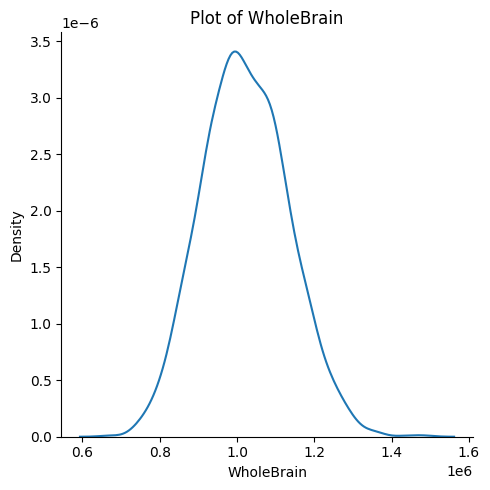

<Figure size 1000x600 with 0 Axes>

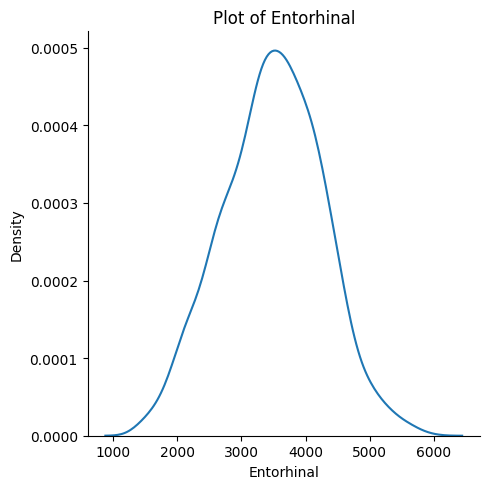

<Figure size 1000x600 with 0 Axes>

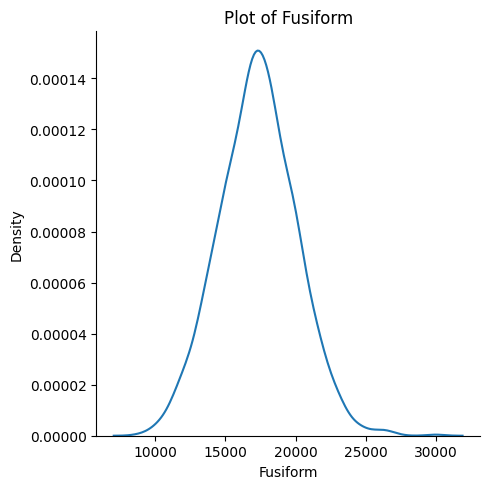

<Figure size 1000x600 with 0 Axes>

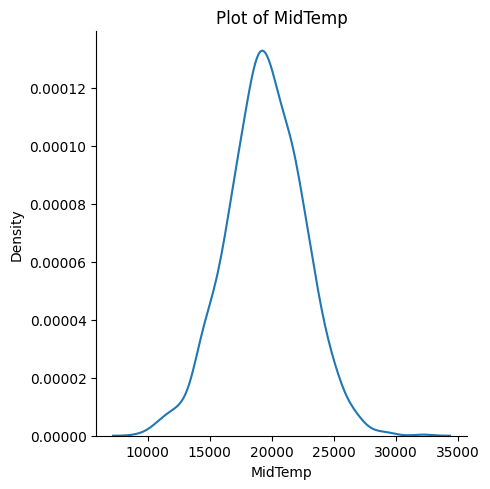

<Figure size 1000x600 with 0 Axes>

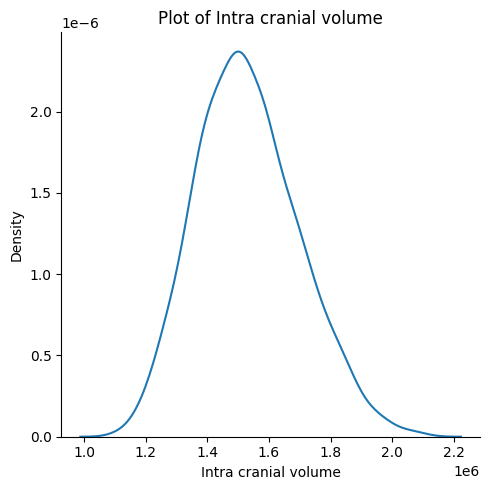

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns to include only numeric types (int and float)
numeric_columns = df_final_merged.select_dtypes(include=['int64', 'float64']).columns

for column_name in numeric_columns:
    plt.figure(figsize=(10, 6))  # Adjusting figure size for better visibility
    sns.displot(df_final_merged[column_name], kind="kde")  # Using KDE plot for distribution
    plt.title('Plot of ' + column_name)
    plt.tight_layout()
    plt.show()
    # Save plot to specified path
    # Ensure the directory exists or adjust the path as necessary
    plt.savefig(f'/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/DistributionPlot/Plot of {column_name} graph.png')
    plt.close()  # Close the plot to avoid displaying it in the notebook output

In [ ]:
df_final_merged

RID  Test_data Diagnosis  FDG_PET  Unnamed: 4 Unnamed: 5  \
0        2          0        CN  1.36926         NaN         CN   
1        3          0        AD  1.09079         NaN        SMC   
2        4          1      LMCI      NaN         NaN       EMCI   
3        5          0        CN  1.29799         NaN        MCI   
4        6          0      LMCI      NaN         NaN       LMCI   
...    ...        ...       ...      ...         ...        ...   
1732  5287          0       SMC  1.58312         NaN        NaN   
1733  5295          0       SMC  1.16317         NaN        NaN   
1734  5296          0       SMC  1.42926         NaN        NaN   
1735  4264          1        CN      NaN         NaN        NaN   
1736  4740          0        AD      NaN         NaN        NaN   

                           Unnamed: 6  CDRSB  ADAS11  ADAS13  ...  \
0                    Cognitive normal    0.0   10.67   18.67  ...   
1          Significant Memory Concern    4.5   22.00   31.00  ...   
2     Early mild cognitive impairment    1.0   14.33   21.33  ...   
3           Mild cognitive impairment    0.0    8.67   14.67  ...   
4      Late mild cognitive impairment    0.5   18.67   25.67  ...   
...                               ...    ...     ...     ...  ...   
1732                              NaN    0.5    3.00    4.00  ...   
1733                              NaN    0.5   11.00   18.00  ...   
1734                              NaN    0.0    9.00   14.00  ...   
1735                              NaN    0.0    3.00    6.00  ...   
1736                              NaN    1.5   29.00   41.00  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                 2.077        
1                                                 1.942        
2     

# Data Preprocessing

## Missing Value Treatment

In [ ]:
# Assess missing values
missing_values = df_final_merged.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:\n", missing_values)

# Handling missing values

## For numerical columns, we'll fill missing values with the median of each column
numeric_columns = df_final_merged.select_dtypes(include=['int64', 'float64']).columns
df_final_merged[numeric_columns] = df_final_merged[numeric_columns].apply(lambda x: x.fillna(x.median()))

## For categorical columns, we'll fill missing values with the mode (most frequent value) of each column
categorical_columns = df_final_merged.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_final_merged[column] = df_final_merged[column].fillna(df_final_merged[column].mode()[0])

# Re-assess missing values to confirm
missing_values_after = df_final_merged.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print("Missing values per column after handling:\n", missing_values_after)


Missing values per column:
 FDG_PET                                                          434
Unnamed: 4                                                      1737
Unnamed: 5                                                      1731
Unnamed: 6                                                      1731
ADAS11                                                             5
ADAS13                                                            14
RAVLT_immediate                                                    6
RAVLT_learning                                                     6
RAVLT_forgetting                                                   6
RAVLT_perc_forgetting                                             11
High_risk_ApoE4                                                   12
Ventricles                                                        82
Hippocampus                                                      248
WholeBrain                                                        48
Entorh

In [ ]:
df_final_merged

RID  Test_data Diagnosis  FDG_PET  Unnamed: 4 Unnamed: 5  \
0        2          0        CN  1.36926         NaN         CN   
1        3          0        AD  1.09079         NaN        SMC   
2        4          1      LMCI  1.24548         NaN       EMCI   
3        5          0        CN  1.29799         NaN        MCI   
4        6          0      LMCI  1.24548         NaN       LMCI   
...    ...        ...       ...      ...         ...        ...   
1732  5287          0       SMC  1.58312         NaN         AD   
1733  5295          0       SMC  1.16317         NaN         AD   
1734  5296          0       SMC  1.42926         NaN         AD   
1735  4264          1        CN  1.24548         NaN         AD   
1736  4740          0        AD  1.24548         NaN         AD   

                           Unnamed: 6  CDRSB  ADAS11  ADAS13  ...  \
0                    Cognitive normal    0.0   10.67   18.67  ...   
1          Significant Memory Concern    4.5   22.00   31.00  ...   
2     Early mild cognitive impairment    1.0   14.33   21.33  ...   
3           Mild cognitive impairment    0.0    8.67   14.67  ...   
4      Late mild cognitive impairment    0.5   18.67   25.67  ...   
...                               ...    ...     ...     ...  ...   
1732              Alzheimer's disease    0.5    3.00    4.00  ...   
1733              Alzheimer's disease    0.5   11.00   18.00  ...   
1734              Alzheimer's disease    0.0    9.00   14.00  ...   
1735              Alzheimer's disease    0.0    3.00    6.00  ...   
1736              Alzheimer's disease    1.5   29.00   41.00  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                 2.077        
1                                                 1.942        
2     

In [ ]:
df_final_merged = df_final_merged.dropna(axis=1, how='all')

In [ ]:
df_final_merged

RID  Test_data Diagnosis  FDG_PET Unnamed: 5  \
0        2          0        CN  1.36926         CN   
1        3          0        AD  1.09079        SMC   
2        4          1      LMCI  1.24548       EMCI   
3        5          0        CN  1.29799        MCI   
4        6          0      LMCI  1.24548       LMCI   
...    ...        ...       ...      ...        ...   
1732  5287          0       SMC  1.58312         AD   
1733  5295          0       SMC  1.16317         AD   
1734  5296          0       SMC  1.42926         AD   
1735  4264          1        CN  1.24548         AD   
1736  4740          0        AD  1.24548         AD   

                           Unnamed: 6  CDRSB  ADAS11  ADAS13  MMSE  ...  \
0                    Cognitive normal    0.0   10.67   18.67    28  ...   
1          Significant Memory Concern    4.5   22.00   31.00    20  ...   
2     Early mild cognitive impairment    1.0   14.33   21.33    27  ...   
3           Mild cognitive impairment    0.0    8.67   14.67    29  ...   
4      Late mild cognitive impairment    0.5   18.67   25.67    25  ...   
...                               ...    ...     ...     ...   ...  ...   
1732              Alzheimer's disease    0.5    3.00    4.00    29  ...   
1733              Alzheimer's disease    0.5   11.00   18.00    29  ...   
1734              Alzheimer's disease    0.0    9.00   14.00    29  ...   
1735              Alzheimer's disease    0.0    3.00    6.00    29  ...   
1736              Alzheimer's disease    1.5   29.00   41.00    22  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                 2.077        
1                                                 1.942        
2                                                  2.18        
3             

## Outlier Cleaning

In [ ]:
# Assuming df_cleaned is your DataFrame from which you want to drop 'RID' and 'Test_data' columns
df_cleaned = df_final_merged.drop(['RID','Test_data'], axis=1)


In [ ]:
def remove_outliers(df, columns):
    cleaned_df = df.copy()
    for column in columns:
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Option 1: Remove outliers
        # cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

        # Option 2: Cap outliers
        cleaned_df[column] = cleaned_df[column].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_df

# df_final_merged is your DataFrame and you want to clean outliers from numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Remove or cap outliers
df_cleaned = remove_outliers(df_cleaned, numeric_columns)


In [ ]:
df_cleaned

Diagnosis   FDG_PET Unnamed: 5                       Unnamed: 6  CDRSB  \
0           CN  1.369260         CN                 Cognitive normal    0.0   
1           AD  1.090790        SMC       Significant Memory Concern    4.5   
2         LMCI  1.245480       EMCI  Early mild cognitive impairment    1.0   
3           CN  1.297990        MCI        Mild cognitive impairment    0.0   
4         LMCI  1.245480       LMCI   Late mild cognitive impairment    0.5   
...        ...       ...        ...                              ...    ...   
1732       SMC  1.493725         AD              Alzheimer's disease    0.5   
1733       SMC  1.163170         AD              Alzheimer's disease    0.5   
1734       SMC  1.429260         AD              Alzheimer's disease    0.0   
1735        CN  1.245480         AD              Alzheimer's disease    0.0   
1736        AD  1.245480         AD              Alzheimer's disease    1.5   

      ADAS11  ADAS13  MMSE  RAVLT_immediate  RAVLT_learning  ...  \
0      10.67   18.67  28.0             44.0             4.0  ...   
1      22.00   31.00  21.5             22.0             1.0  ...   
2      14.33   21.33  27.0             37.0             7.0  ...   
3       8.67   14.67  29.0             37.0             4.0  ...   
4      18.67   25.67  25.0             30.0             1.0  ...   
...      ...     ...   ...              ...             ...  ...   
1732    3.00    4.00  29.0             50.0            10.0  ...   
1733   11.00   18.00  29.0             28.0             4.0  ...   
1734    9.00   14.00  29.0             38.0             2.0  ...   
1735    3.00    6.00  29.0             48.0             7.0  ...   
1736   26.00   41.00  22.0              8.0             2.0  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                 0.694       
1                                                 0.591       
2                                                 0.588       
3                                                 0.628       
4                                                 0.631       
...                                                 ...       
1732                                              0.554       
1733                                              0.708       
1734                                              0.552       
1735                                              0.572       
1736                                              0.654       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                  3835            
1                                                  3681            
2                                                  4060            
3                                                  5180            
4                                                  3078            
...                                                 ...            
1732                                               3958            
1733                                               4342            
1734                                               6157            
1735                                               4326            
1736                                               4748            

      Surface Area of RightMedialOrbitofrontal  \
0                                         1622   
1                                         1734   
2                                         1728   
3                                         1868   
4                                         1241   
...                                        ...   
1732                                      1652   
1733                                      1661   
1734                                      2398   
1735                                      1723   
1736                                      2132   

     Cortical Thickness Average of RightMedialOrbitofrontal  \
0

# Feature Selection

In [ ]:
def corr_heatmap(data, idx_s, idx_e):

    plt.figure(figsize=(22,10))
    y = data['Diagnosis']
    temp = data.iloc[:, idx_s:idx_e]
    if 'RID' in temp.columns:
        del temp['RID']
        del temp['Test_data']
    temp['Diagnosis'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.title('Heat Map of Correlation Matrix of Netwrok Traffic Data', fontsize = 22)
    plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/fullcorrelationgraph.png')
    plt.show()

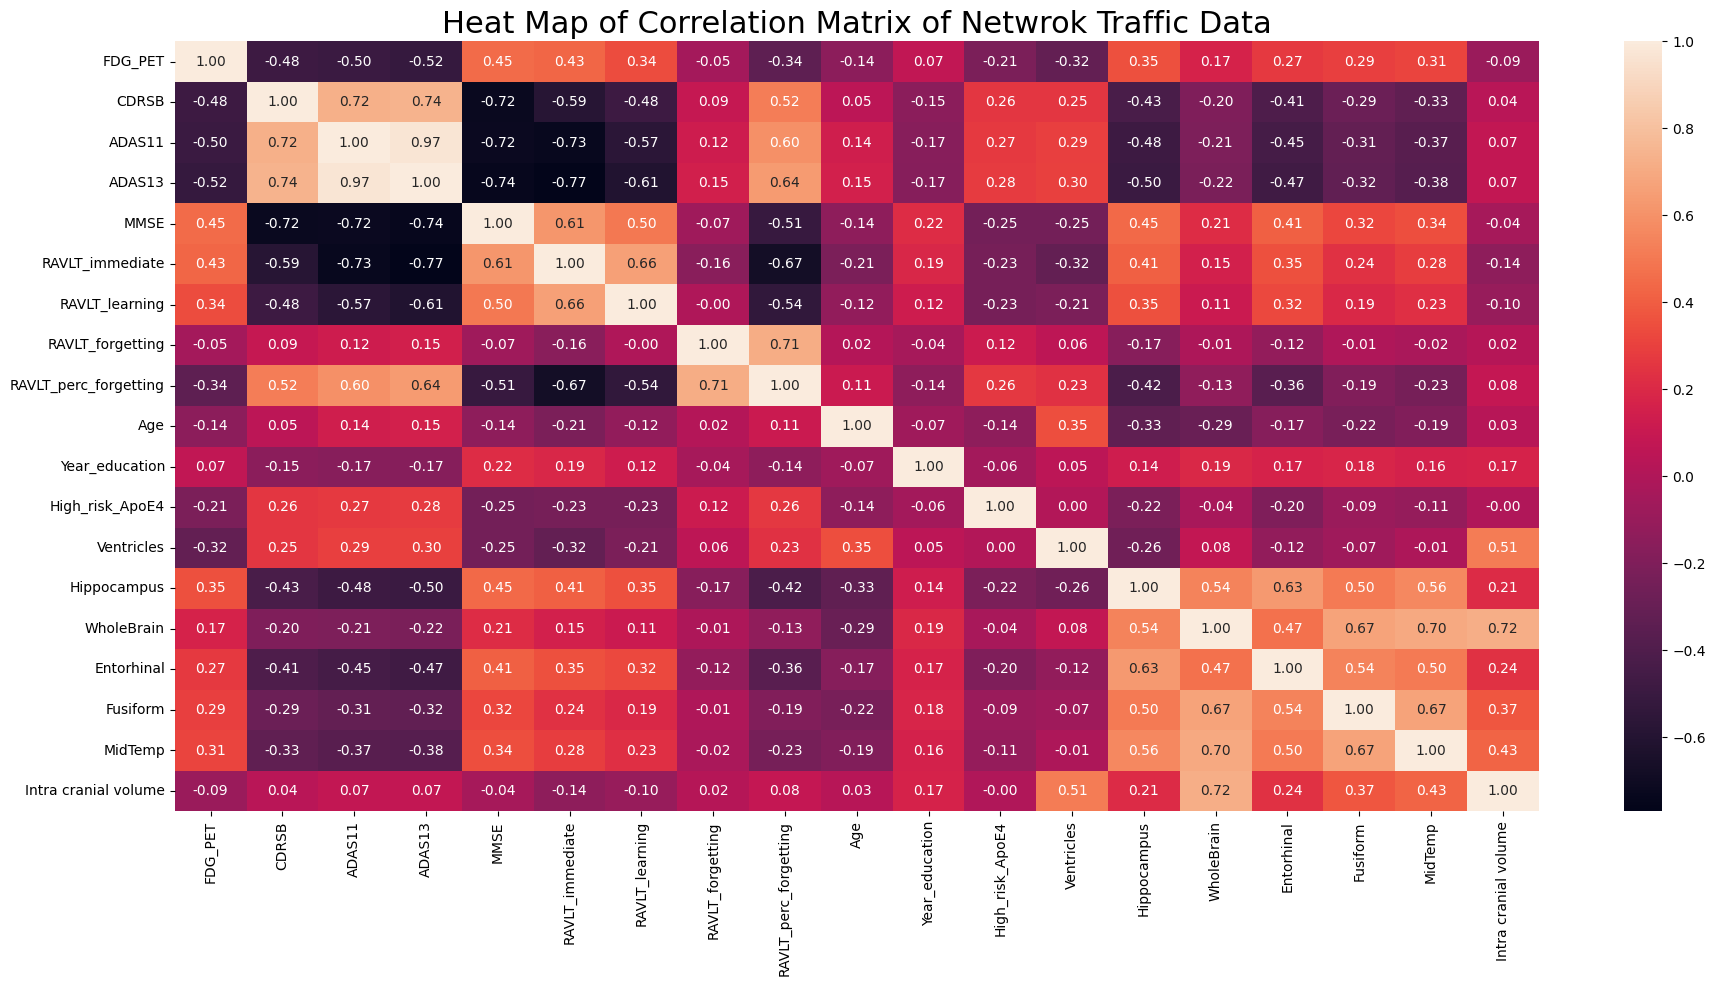

In [ ]:
corr_heatmap(df_cleaned, 0, len(df_cleaned))

Correlation Matrix                        Diagnosis   FDG_PET     CDRSB    ADAS11    ADAS13  \
Diagnosis               1.000000  0.238129 -0.396104 -0.324627 -0.300569   
FDG_PET                 0.238129  1.000000 -0.487923 -0.517276 -0.524347   
CDRSB                  -0.396104 -0.487923  1.000000  0.721078  0.732804   
ADAS11                 -0.324627 -0.517276  0.721078  1.000000  0.967159   
ADAS13                 -0.300569 -0.524347  0.732804  0.967159  1.000000   
MMSE                    0.399189  0.457307 -0.721987 -0.718172 -0.734561   
RAVLT_immediate         0.174228  0.429294 -0.580144 -0.721796 -0.766294   
RAVLT_learning          0.151498  0.335878 -0.472944 -0.554784 -0.607647   
RAVLT_forgetting        0.065740 -0.031901  0.083413  0.091180  0.132572   
RAVLT_perc_forgetting  -0.134897 -0.334385  0.505623  0.576278  0.630251   
Age                    -0.094577 -0.110846  0.058335  0.125402  0.145963   
Year_education          0.081643  0.066527 -0.150863 -0.157472 -0.168

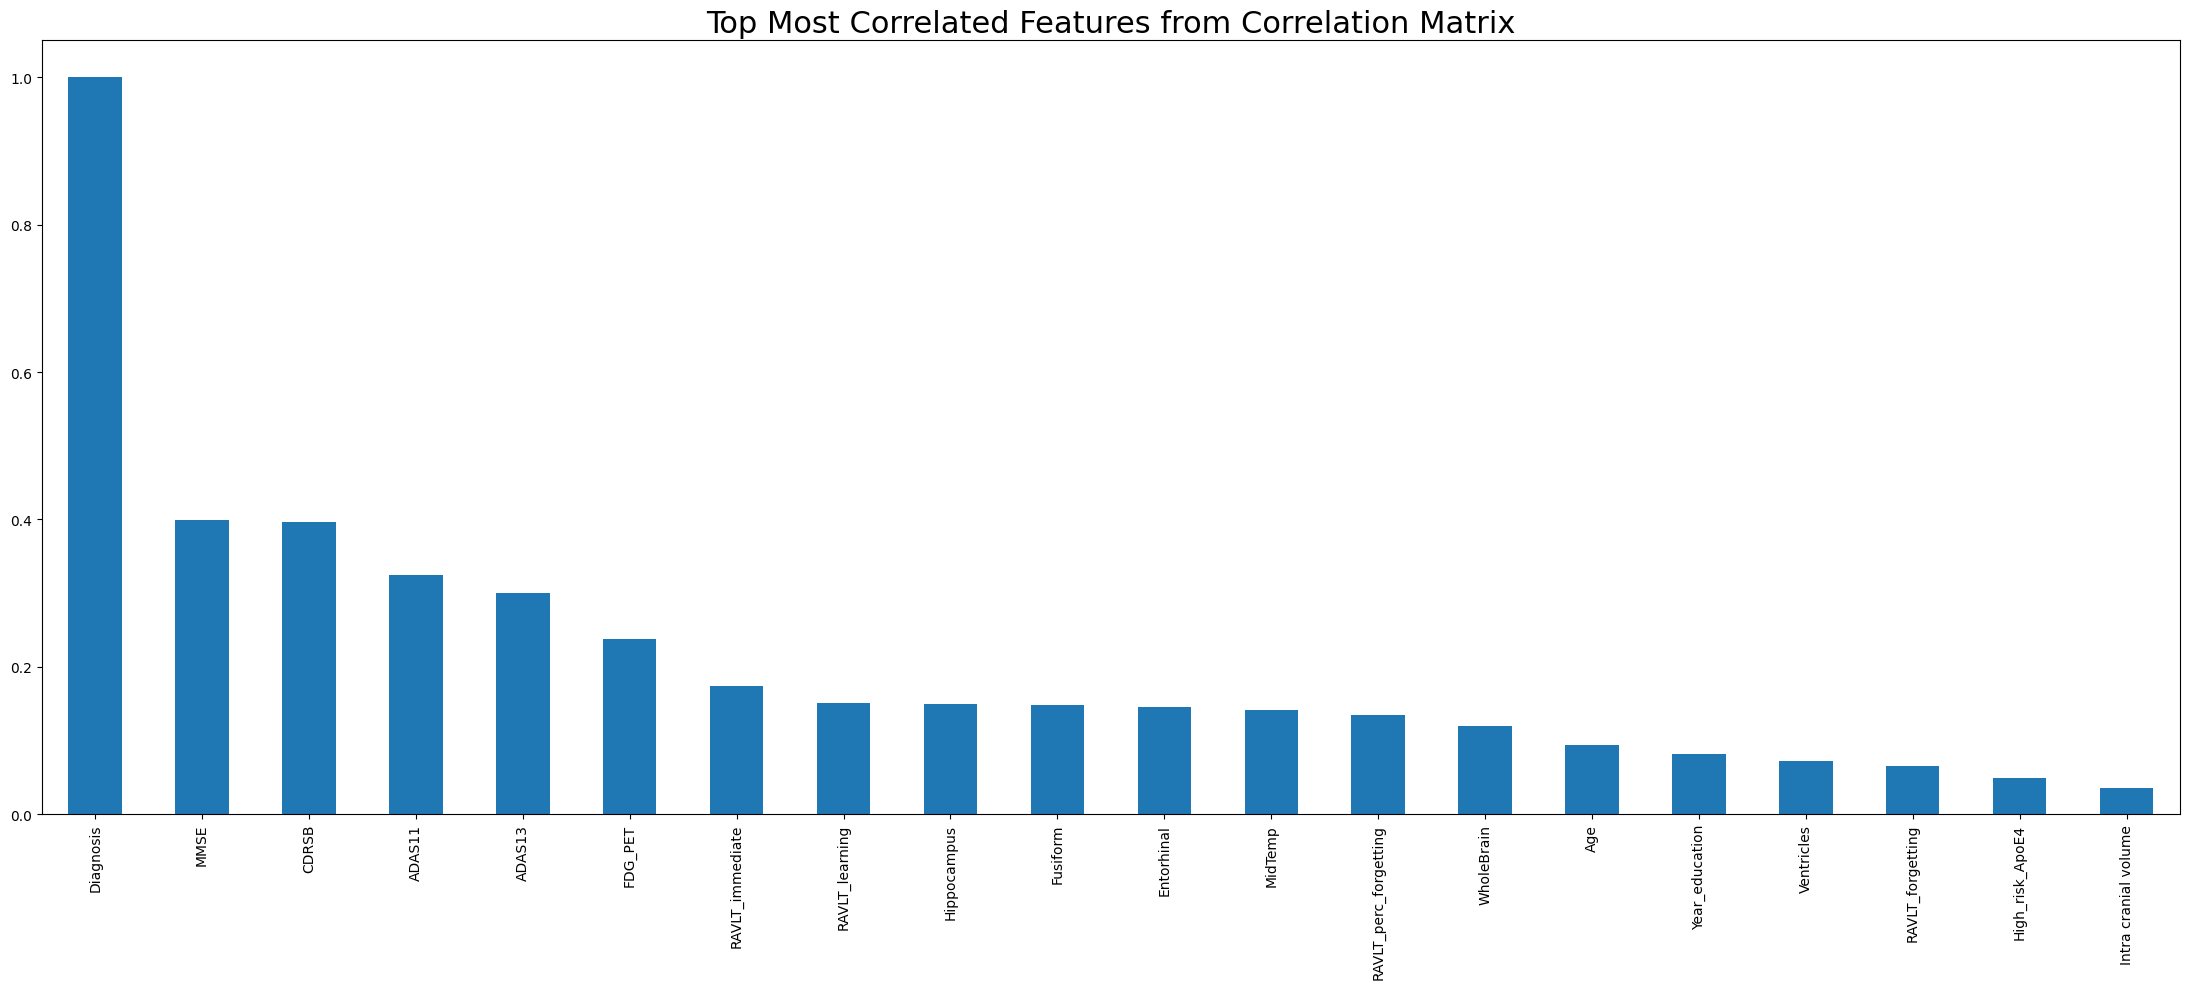

In [ ]:
# Correlation Matrix Heatmap
from sklearn import preprocessing
target=df_final_merged
target = target.drop(['RID', 'Test_data'], axis=1)
le = preprocessing.LabelEncoder()
target['Diagnosis']=le.fit_transform(target['Diagnosis'])
corrmat = target.corr()
print("Correlation Matrix",corrmat)
# Correlation with output variable
cor_target = abs(corrmat['Diagnosis'])
cor_target.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/cor_targetfeatures.csv')
# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.01]
print("Most Correlated:",relevant_features)
most_corr1 = pd.DataFrame(columns=['Most Correlated Features','Score'])
most_corr1['Most Correlated Features']=relevant_features.index
most_corr1['Score']=relevant_features.values
most_corr1.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/mostcorrelatedfeatures.csv')
plt.figure(figsize=(22,10))
cor_target=cor_target.sort_values(ascending=False)
cor_target=cor_target.dropna()
cor_target.plot.bar();
plt.title('Top Most Correlated Features from Correlation Matrix', fontsize = 22)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/correlationgraph.png')
plt.show()

In [ ]:
most_corr1

Most Correlated Features     Score
0                 Diagnosis  1.000000
1                   FDG_PET  0.238129
2                     CDRSB  0.396104
3                    ADAS11  0.324627
4                    ADAS13  0.300569
5                      MMSE  0.399189
6           RAVLT_immediate  0.174228
7            RAVLT_learning  0.151498
8          RAVLT_forgetting  0.065740
9     RAVLT_perc_forgetting  0.134897
10                      Age  0.094577
11           Year_education  0.081643
12          High_risk_ApoE4  0.049538
13               Ventricles  0.072185
14              Hippocampus  0.149095
15               WholeBrain  0.120244
16               Entorhinal  0.146042
17                 Fusiform  0.147911
18                  MidTemp  0.141469
19     Intra cranial volume  0.036258

In [ ]:
MostcorrelatedFeatures=most_corr1['Most Correlated Features'][:-1]
MostcorrelatedFeatures

0                 Diagnosis
1                   FDG_PET
2                     CDRSB
3                    ADAS11
4                    ADAS13
5                      MMSE
6           RAVLT_immediate
7            RAVLT_learning
8          RAVLT_forgetting
9     RAVLT_perc_forgetting
10                      Age
11           Year_education
12          High_risk_ApoE4
13               Ventricles
14              Hippocampus
15               WholeBrain
16               Entorhinal
17                 Fusiform
18                  MidTemp
Name: Most Correlated Features, dtype: object

# Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_cleaned is your DataFrame

# Extract categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode each categorical column individually, ensuring all data is converted to string type first
for column in categorical_columns:
    # Convert to string to ensure uniform data type
    df_cleaned[column] = df_cleaned[column].astype(str)
    df_cleaned[column] = encoder.fit_transform(df_cleaned[column])

# Check if 'Diagnosis' column exists and proceed with separation
if 'Diagnosis' in df_cleaned.columns:
    # Assuming 'Diagnosis' is your target variable
    df_final_merged_x = df_cleaned.drop(['Diagnosis'], axis=1)  # Encoded features without the Diagnosis column
    df_final_merged_y = df_cleaned[['Diagnosis']].copy()  # Only the Diagnosis column as target


In [ ]:
df_final_merged_x

FDG_PET  Unnamed: 5  Unnamed: 6  CDRSB  ADAS11  ADAS13  MMSE  \
0     1.369260           1           1    0.0   10.67   18.67  28.0   
1     1.090790           5           5    4.5   22.00   31.00  21.5   
2     1.245480           2           2    1.0   14.33   21.33  27.0   
3     1.297990           4           4    0.0    8.67   14.67  29.0   
4     1.245480           3           3    0.5   18.67   25.67  25.0   
...        ...         ...         ...    ...     ...     ...   ...   
1732  1.493725           0           0    0.5    3.00    4.00  29.0   
1733  1.163170           0           0    0.5   11.00   18.00  29.0   
1734  1.429260           0           0    0.0    9.00   14.00  29.0   
1735  1.245480           0           0    0.0    3.00    6.00  29.0   
1736  1.245480           0           0    1.5   26.00   41.00  22.0   

      RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  ...  \
0                44.0             4.0               6.0  ...   
1                22.0             1.0               4.0  ...   
2                37.0             7.0               4.0  ...   
3                37.0             4.0               4.0  ...   
4                30.0             1.0               5.0  ...   
...               ...             ...               ...  ...   
1732             50.0            10.0               4.0  ...   
1733             28.0             4.0               4.0  ...   
1734             38.0             2.0               6.0  ...   
1735             48.0             7.0              10.5  ...   
1736              8.0             2.0               2.0  ...   

      Cortical Thickness Standard Deviation of RightLingual  \
0                                                   239       
1                                                   136       
2                                                   133       
3                                                   173       
4                                                   176       
...                                                 ...       
1732                                                 99       
1733                                                251       
1734                                                 97       
1735                                                117       
1736                                                199       

      Volume (Cortical Parcellation) of RightMedialOrbitofrontal  \
0                                                   387            
1                                                   293            
2                                                   519            
3                                                  1127            
4                                                    65            
...                                                 ...            
1732                                                457            
1733                                                702            
1734                                               1268            
1735                                                692            
1736                                                940            

      Surface Area of RightMedialOrbitofrontal  \
0                                          321   
1                                          430   
2                                          424   
3                                          554   
4                                           25   
...                                        ...   
1732                                       351   
1733                                       360   
1734                                       763   
1735                                       419   
1736                                       721   

      Cortical Thickness Average of RightMedialOrbitofrontal  \
0                                                   189        
1                                                    87        
2                 

In [ ]:
df_final_merged_y

Diagnosis
0             1
1             0
2             3
3             1
4             3
...         ...
1732          4
1733          4
1734          4
1735          1
1736          0

[1737 rows x 1 columns]

# Dataset Partition

In [ ]:
# Splitting the features DataFrame into training and test sets
X_train = df_final_merged_x[df_final_merged['Test_data'] == 0]
X_test = df_final_merged_x[df_final_merged['Test_data'] == 1]

# If df_final_merged_y is a Series, ensure it has the 'Test_Data' column for splitting,
# this might require keeping it in a DataFrame until this point or joining with the 'Test_Data' column temporarily.
# Assuming df_final_merged_y is still part of a DataFrame that includes 'Test_Data':
Y_train = df_final_merged_y[df_final_merged['Test_data'] == 0]
Y_test = df_final_merged_y[df_final_merged['Test_data'] == 1]



In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1390, 370) (347, 370) (1390, 1) (347, 1)


# Model Configuration and Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Assuming X_train and Y_train are already defined and ready for training
# Define your model parameters
max_samples_ratio = 0.9
n_estimators = 10

# Initialize the BaggingClassifier with a RandomForestClassifier as the base estimator
Basicbagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=n_estimators, max_samples=max_samples_ratio)

# Fit the model to your training data
Basicbagging.fit(X_train, Y_train)

# Now, the model named Basicbagging is trained on your training data

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.9)

In [ ]:
import joblib

def save_model(model,modelname):
  model_path = '/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/model/'
  modelfilename=modelname+'_model.sav'
  joblib.dump(model, model_path+modelfilename)

save_model(Basicbagging, 'Basic_Bagging')

# Model Performance Evoluation

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

def mlresults(modelname ,v, Y_test,pred,X_test):
  scores = cross_val_score(v, X_test, Y_test, cv=10)
  le = preprocessing.LabelEncoder()
  target=le.fit_transform(Y_test)
  predicted = le.fit_transform(pred)
  accuracy = metrics.accuracy_score(target, predicted)
  confusion_matrix = metrics.confusion_matrix(target, predicted)
  print('============================== {} Model Test Results =============================='.format(modelname))
  print()
  # Plot ROC curve
  plt.figure(figsize=(15,15))
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(Y_test))
  cm_display.plot()
  plt.title('Confusion Matrix of '+modelname, fontsize = 16)
  plt.tight_layout()
  plt.savefig('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/'+modelname+'confusionmatrixgraph.png')
  plt.show()
  classification = metrics.classification_report(target, predicted)
  accuracy = metrics.accuracy_score(target, predicted)
  mse=mean_squared_error(target, predicted)
  mae = metrics.mean_absolute_error(target, predicted)
  rs=r2_score(target, predicted)
  print("Cross Validation Mean Score:" "\n", scores.mean())
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Mean squared error: ", mse)
  print()
  print('Variance score: %.2f' % rs)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  print()
  print("Classification report:" "\n", classification)

  return scores.mean(),accuracy,mse,mae,rs

============================== Basic Bagging Model Test Results ==============================



<Figure size 1500x1500 with 0 Axes>

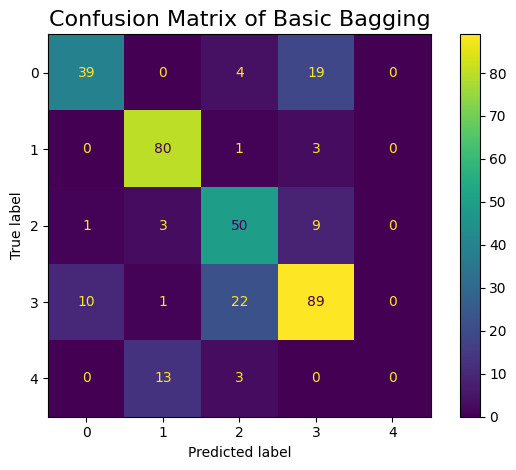

Cross Validation Mean Score:
 0.6447058823529411

Model Accuracy:
 0.7435158501440923

Mean squared error:  1.3285302593659942

Variance score: 0.10

Confusion matrix:
 [[39  0  4 19  0]
 [ 0 80  1  3  0]
 [ 1  3 50  9  0]
 [10  1 22 89  0]
 [ 0 13  3  0  0]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70        62
           1       0.82      0.95      0.88        84
           2       0.62      0.79      0.70        63
           3       0.74      0.73      0.74       122
           4       0.00      0.00      0.00        16

    accuracy                           0.74       347
   macro avg       0.59      0.62      0.60       347
weighted avg       0.71      0.74      0.72       347



In [ ]:
from sklearn import metrics

models = []
models.append(('Basic Bagging', Basicbagging))
accuracy_score=list()
mse_values=list()
variance_score=list()
modelnames= list()
resultscore=pd.DataFrame(columns=['Model','Cross Validation Score','Accuracy','Mean Square Error','Mean Absolute Error','Root2 Score'])
j=0
for i, v in models:
    scores,accuracy,mse,mae,rs=mlresults(i,v, Y_test,v.predict(X_test),X_test)
    accuracy_score.append(accuracy)
    mse_values.append(mse)
    variance_score.append(rs)
    resultscore.loc[j] =[i,scores,accuracy,mse,mae,rs]
    j=j+1
    modelnames.append(i)

In [ ]:
resultscore

Model  Cross Validation Score  Accuracy  Mean Square Error  \
0  Basic Bagging                0.644706  0.743516            1.32853   

   Mean Absolute Error  Root2 Score  
0             0.533141     0.095363

In [ ]:
resultscore.to_csv('/content/drive/MyDrive/CSI_7_MAL_2324_CW_resit/results/Resulttable.csv')
resultscore

Model  Cross Validation Score  Accuracy  Mean Square Error  \
0  Basic Bagging                0.644706  0.743516            1.32853   

   Mean Absolute Error  Root2 Score  
0             0.533141     0.095363